# Lý thuyết phương pháp
- Chia: Chia nhỏ dữ liệu đầu vào thành từng phần đủ nhỏ để giải
- Trị: Giải kết quả của bài toán con vừa đặt ra
- Hợp: Hợp lại các kết quả của các bài toán con vừa giải lên từng cấp để ra kết quả bài toán ban đầu

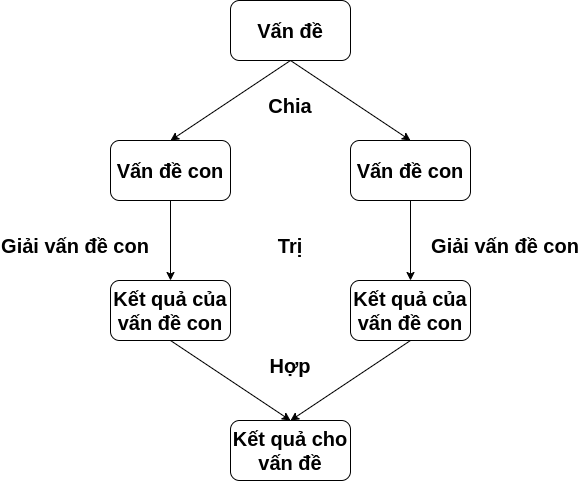

Ví dụ: Merge Sort

![](https://media.geeksforgeeks.org/wp-content/uploads/20220722205737/MergeSortTutorial.png)

# Bài tập tư duy
## Stock Pricing Problem:
Consider the stock price of CareerMonk.com in n consecutive days. That means the input consists of an array with stock prices of the company. We know that the stock price will not be the same on all the days. In the input stock prices there may be dates where the stock is high when we can sell the current holdings, and there may be days when we can buy the stock. Now our problem is to find the day on which we can buy the stock and the day on which we can sell the stock so that we can make maximum profit.
- Tóm tắt bài toán: Cho một mảng n giá trị, tìm cặp giá trị (i,j) sao cho j > i và giá trị của mảng tại vị trí j trừ đi giá trị tại vị trí i là lớn nhất
- Phân tích bài toán:
    - Chúng ta chia mảng giá cổ phiếu thành hai nửa và gọi đệ quy cho mỗi nửa để tìm lợi nhuận tối đa cho mỗi nửa. Sau đó, chúng ta tính lợi nhuận thu được từ việc mua ở nửa đầu và bán ở nửa sau bằng cách lấy giá trị lớn nhất của nửa sau trừ đi giá trị nhỏ nhất của nửa đầu. Cuối cùng, chúng ta so sánh lợi nhuận thu được từ việc mua/bán trong cùng một nửa với lợi nhuận thu được từ việc mua ở nửa đầu và bán ở nửa sau để tìm ra lợi nhuận tối đa cho toàn bộ mảng và trả về kết quả.
    - Độ phức tạp thời gian: $O(n\log n)$
- Thuật toán:

In [1]:
def max_profit(prices):
    n = len(prices)
    if n < 2:
        return 0, None, None
    mid = n // 2
    left_profit, left_buy, left_sell = max_profit(prices[:mid])
    right_profit, right_buy, right_sell = max_profit(prices[mid:])
    cross_profit = max(prices[mid:]) - min(prices[:mid])
    if cross_profit > max(left_profit, right_profit):
        buy = prices.index(min(prices[:mid]))
        sell = mid + prices[mid:].index(max(prices[mid:]))
        return cross_profit, buy, sell
    elif left_profit > right_profit:
        return left_profit, left_buy, left_sell
    else:
        return right_profit, right_buy + mid if right_buy is not None else None, right_sell + mid if right_sell is not None else None

In [2]:
prices = [10, 7, 11, 8, 9, 5]
profit, buy_day, sell_day = max_profit(prices)
print(f"Maximum profit: {profit}")
print(f"Buy on day: {buy_day + 1}")
print(f"Sell on day:{sell_day + 1}")

Maximum profit: 4
Buy on day: 2
Sell on day:3


## Drop test
We are testing “unbreakable” laptops and our goal is to find out how unbreakable they really are. In particular, we work in an n-story building and want to find out the lowest floor from which we can drop the laptop without breaking it (call this “the ceiling”). Suppose we are given two laptops and want to find the highest ceiling possible. Give an algorithm that minimizes the number of tries we need to make f(n) (hopefully, f(n) is sublinear, as a linear f(n) yields a trivial solution).
- Tóm tắt bài toán: Tìm kiếm điểm cao nhất thả laptop mà laptop rơi mà không có vấn đề gì (Tìm kiếm tương đối trên mảng đã sắp xếp)
- Phân tích bài toán:
    - Chia tòa nhà thành m phần
    - Thả lần lượt ở tầng cao nhất từng phần từ thấp đến cho tới khi vỡ
    - Như vậy độ cao tối đa mà laptop chịu được ở vừa thả và tầng kế tiếp được thả. Ta chia tiếp ra thành m phần
    - Lại tiếp tục thả như vậy cho đến khi laptop vỡ, ta xấp xỉ được độ cao tối đa mà thả laptop không vỡ
    - Độ phức tạp $O(\log_m n)$ m càng lớn, chạy càng nhanh sai số càng lớn, m càng nhỏ chạy càng chậm sai số càng thấp

In [36]:
import random


class DropTest():
    max_floor = 0
    break_point = 0
    laptop = 2
    count = 0

    def __init__(self, max_floor):
        self.max_floor = max_floor
        self.break_point=random.randint(0,max_floor)
        self.count = 0


    def test(self,split,start=0,stop=0):
        if stop == 0:
            stop = self.max_floor
        if self.count is None:
            self.count = 0
        break_point_predict = 0
        for i in range(start,stop,split):
            self.count = self.count + 1
            if i >= self.break_point:
                self.laptop = self.laptop -1
                if self.laptop > 0:
                    break_point_predict = self.test(split,i-split-1,i)
                    print(f'Max floor: {self.max_floor}')
                    print(f'Break point: {self.break_point}')
                    print(f'Test time: {self.count}')
                    print(f'Break point in test: {break_point_predict}')
                    self.count = 0
                    self.laptop = 2
                else:
                    return i-1
                break



In [38]:
test = DropTest(100)
test.test(2)
test.test(10)

Max floor: 100
Break point: 67
Test time: 37
Break point in test: 66
Max floor: 100
Break point: 67
Test time: 10
Break point in test: 68


# Bài tập lập trình
## Tìm kiếm nhị phân trên mảng được sắp.

In [5]:
def binary_search(sample, target, left_index=0, right_index=None):
    if right_index is None:
        right_index = len(sample) - 1
    if sample[left_index] == target:
        return left_index
    elif sample[right_index] == target:
        return right_index
    elif left_index >= right_index:
        return -1
    mid_index = (left_index + right_index) // 2
    if sample[mid_index] == target:
        return mid_index
    elif sample[mid_index] > target:
        return binary_search(sample, target, left_index, mid_index - 1)
    else:
        return binary_search(sample, target, mid_index + 1, right_index)


binary_search([_ for _ in range(1000)], 356)

356

## Tìm giá trị lớn nhất và nhỏ nhất trong một dãy n giá trị.

In [6]:
def find_max_min(sample):
    if len(sample) == 1:
        return sample[0], sample[0]
    else:
        mid_index = len(sample) // 2
        left_min, left_max = find_max_min(sample[:mid_index])
        right_min, right_max = find_max_min(sample[mid_index:])
        return min(left_min, right_min), max(left_max, right_max)


import random

sample = [_ for _ in range(1000)]
random.shuffle(sample)

find_max_min(sample)

(0, 999)

## Check for Majority Element in a sorted array

In [7]:
def _binary_search(sample, target, left_index=0, right_index=None):
    if right_index is None:
        right_index = len(sample) - 1
    if left_index <= right_index:
        mid_index = (left_index + right_index) // 2
        if (mid_index == 0 or target > sample[mid_index - 1]) and sample[mid_index] == target:
            return mid_index
        elif sample[mid_index] < target:
            return _binary_search(sample, target, mid_index + 1, right_index)
        else:
            return _binary_search(sample, target, left_index, mid_index - 1)
    else:
        return -1


def is_majority_element(sample, target):
    n = len(sample)
    i = _binary_search(sample, target)
    return i != -1 and ((i + n // 2) <= (n - 1)) and sample[i + n // 2] == target

In [8]:
sample = [1, 3, 3, 3, 10]
is_majority_element(sample, 3)

True

In [9]:
sample = [1, 3, 3, 8, 10]
is_majority_element(sample, 3)

False

# Đặt bài toán, thiết kế, phân tích và triển khai thuật toán

## Bài toán tìm đồng xu giả (Fake Coin problem) (Anany’s book, sec 4.4)

- Tóm tắt bài toán: sử dụng cân đĩa để timg đồng xu giả  nhẹ hơn đồng xu thật
- Phân tích bài toán:
    - Chia làm hai đống có số tiền bằng nhau, nếu có đồng xu dư sẽ để riêng
    - Cân 2 đống đồng xu nếu:
    1. 2 đống đồng xu bằng nhau -> đồng xu dư là giả, cân đồng xu giả với đồng xu thật (Case 1: 2 lần cân)
    2. 2 đống xu không bằng nhau lấy đống nhẹ hơn, bỏ đồng xu dư nếu có, chia làm đôi rồi so sánh
           1. Nếu hai đống cân bằng nhau mà không có xu dư -> đồng xu giả nặng hơn ở đống nặng hơn (Case 2: 2 lần cân)
           2. Nếu hai đống cân bằng nhau mà có xu dư, Cân đồng xu dư với 1 đồng xu trong đống vừa chia:
                - Bằng nhau -> xu giả ở đống nặng hơn và nặng hơn (Case 3: 3 lần cân)
                - Không bằng nhau -> xu giả là đồng xu nhẹ hơn
           3. Nếu hai đống cân không bằng nhau -> xu giả nhẹ hơn và nằm ở đống nhẹ hơn sau khi chia đôi từ đống nhẹ hơn (Case 4: 2 lần cân)
        - Gộp lại: đồng xu giả nặng hơn khi các đồng xu trong đống bằng nhau còn không sẽ nhẹ hơn
- Xây dựng thuật toán:
    - Quy ước
        - -1: Nặng hơn
        - 0: Bằng nhau
        - 1: Nhẹ hơn

In [10]:
def weight(coins_left, coin_right):
    left = sum(coins_left)
    right = sum(coin_right)
    return -1 if left > right else 1 if right > left else 0

def find_fake_coin(coins):
    last_coin = coins[-1] if len(coins) % 2 == 1 else 0
    mid = len(coins) // 2
    coins_left = coins[:mid]
    coins_right = coins[mid:] if last_coin == 0 else coins[mid:len(coins) - 1]
    status = weight(coins_left, coins_right)
    if status == 0:
        return last_coin
    elif status == 1:
        return find_fake_coin(coins_left)
    elif status == -1:
        return find_fake_coin(coins_right)

In [11]:
print(find_fake_coin([1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9, 1, 1]))  # lighter

0.9


## Phương pháp khử Gauss: giải hệ PT; tính định thức; tìm ma trận nghịch đảo (Gaussian Elimination)
- Triển khai phương pháp khử Gauss trong đại số tuyến tính
    - Xét từng hàng, lấy cột giá trị tuyệt đối cao nhất khác 0 trên đoạn từ số hàng đến hết
    - Lấy số tại các cột và hàng đó chia cho các số cùng cột ta được f
    - Các hàng còn lại gán bằng hàng đó trừ đi f lần hàng được chọn (Đây là biến đổi tương đương không làm thay đổi định thức ma trận)
    - Sau n vòng lặp ma trận sẽ về ma trận đường chéo.
    - Đối với ma trận vuông, tích các phần tử trên đường chéo chính là định thức ma trận
    - Từ ma trận vừa thu được ta sẽ chia từng hàng cho số khác không đầu tiên của hàng để rút gọn ma trận. Từ đó ta thu được nghiệm của phương trình

In [12]:
import numpy as np


def gauss_elimination(A):
    h = 0  # Initialization of the pivot row
    k = 0  # Initialization of the pivot column
    m, n = A.shape
    while h < m and k < n:
        # Find the k-th pivot:
        i_max = np.argmax(np.abs(A[h:m, k]))
        if A[i_max, k] == 0:
            # No pivot in this column, pass to next column
            k = k + 1
        else:
            # Do for all rows below pivot:
            for i in range(h + 1, m):
                if A[h, k] != 0:
                    f = A[i, k] / A[h, k]
                    # Subtract below row with current row:
                    A[i, :] = A[i, :] - A[h, :] * f
            # Increase pivot row and column
            h = h + 1
            k = k + 1
    det = None
    if m == n:
        det = 1
        for i in range(m):
            det = det * A[i,i]
    for i in range(m):
        for j in range(n):
            if A[i, j] != 0:
                # minimize pivot to 1

                A[i, :] = A[i, :] / A[i, j]
                # Subtract row with row:
                for k in range(m):
                    if i != k:
                        f = A[k, j] / A[i, j]
                        A[k, :] = A[k, :] - A[i, :] * f
                break
    if det is None:
        return A
    else:
        return A,det

In [13]:
gauss_elimination(np.array([[3, 2, -4, 3], [2, 3, 3, 15], [5, -3, 1, 14]], dtype=float))  # Solve system of equations

array([[1., 0., 0., 3.],
       [0., 1., 0., 1.],
       [0., 0., 1., 2.]])

In [14]:
gauss_elimination(np.array([[6, 1, 1], [4, -2, 5], [2, 8, 7]], dtype=float))  # Calculate determinant

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 -306.0)

In [15]:
gauss_elimination(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)) # Calculate determinant

(array([[ 1.,  0., -1.],
        [-0.,  1.,  2.],
        [ 0.,  0.,  0.]]),
 -0.0)

- Triển khai tính định thức ma trận
    - Đối với ma trận cỡ 1x1 định thức ma trận là phần tử đó
    - Đối với ma trận lớn cỡ $n \times n$ hơn ta sẽ chọn 1 hàng (i) rồi bỏ đi hàng đó sau đó ta sẽ lần lượt bỏ từng cột (j) thu được ma trận con A(i,j)
    - Định thức ma trận là $det=\sum_{j=1}^n (-1)^j A[i,j]det(A(i,j))$
    - Ma trận không vuông không có định thức

In [16]:
def determinant(A):
    if A.shape[0] != A.shape[1]:
        # check if matrix is square
        return False
    if A.shape[0] == 1:
        return A[0, 0]
    else:
        det = 0
        # choose the first row
        for i in range(A.shape[0]):
            # delete the first row and ith column
            temp = np.delete(A, 0, 0)
            temp = np.delete(temp, i, 1)
            det += (-1) ** i * A[0, i] * determinant(temp)
        return det # Calculate determinant

In [17]:
determinant(np.array([[6, 1], [4, -2]], dtype=float))

-16.0

In [18]:
determinant(np.array([[6, 1, 1], [4, -2, 5], [2, 8, 7]], dtype=float))

-306.0

- Triển khai tìm ma trận nghịch đảo
    - Nếu det bằng 0 hoặc không xác định, ma trận không khả nghịch
    - Ghép ma trận A với ma trận đơn vị cùng cỡ sau đó khử Guass
    - Lấy nửa bên phải là ma trận A đã được nghịch đảo

In [19]:
def inverse_matrix(A):
    det = determinant(A)
    if det == False or det == 0:
        # check if matrix invertible
        return False
    else:
        I = np.identity(A.shape[0])
        AI = np.hstack((A, I))
        invA = gauss_elimination(AI)[:, A.shape[1]:]
        return invA

In [20]:
inp = np.array([[1, 2], [3, 4]], dtype=float)
res = inverse_matrix(inp)  # Find inverse matrix
print(res)
print(np.matmul(res,inp))

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1. 0.]
 [0. 1.]]
